# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")

# **Loading the DataSet**

In [2]:
df = pd.read_csv('Cancer.csv')

# **Reading the DataSet**

In [3]:
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5.0,1,1,1,2,1,3.0,1,1,2
1,1002945,5.0,4,4,5,7,10,3.0,2,1,2
2,1015425,3.0,1,1,1,2,2,3.0,1,1,2
3,1016277,6.0,8,8,1,3,4,3.0,7,1,2
4,1017023,4.0,1,1,#,2,1,3.0,1,1,2


# **Shape of the DataSet**

In [4]:
print('Dataset contains',df.shape[0],'rows and',df.shape[1],'columns.')

Dataset contains 699 rows and 11 columns.


# **Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           699 non-null    int64  
 1   ClumpThickness               698 non-null    float64
 2   Cell Size                    699 non-null    int64  
 3   Cell Shape                   698 non-null    object 
 4   Marginal Adhesion            698 non-null    object 
 5   Single Epithelial Cell Size  697 non-null    object 
 6   Bare Nuclei                  699 non-null    object 
 7   Normal Nucleoli              696 non-null    float64
 8   Bland Chromatin              699 non-null    object 
 9   Mitoses                      699 non-null    object 
 10  Class                        699 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 60.2+ KB


**Observation:**
- Many column contains wrong Datatypes.

# **Cleaning the Data and Correcting the Datatypes**

In [6]:
df.drop('ID',axis = 1,inplace = True)

In [7]:
df['Cell Shape'].unique()

array(['1', '4', '8', '10', '2', '##', '3', '5', '6', '7', '9', '@@@',
       '600', nan], dtype=object)

In [8]:
df['Cell Shape'].replace(['##','@@@'],np.nan,inplace = True)

In [9]:
df['Cell Shape'] = pd.to_numeric(df['Cell Shape'])

In [10]:
df['Marginal Adhesion'].unique()

array(['1', '5', '#', '8', '3', '10', '4', '6', '2', '9', '7', nan],
      dtype=object)

In [11]:
df['Marginal Adhesion'].replace('#',np.nan,inplace = True)

In [12]:
df['Marginal Adhesion'] = pd.to_numeric(df['Marginal Adhesion'])

In [13]:
df['Single Epithelial Cell Size'].unique()

array(['2', '7', '3', '1', '6', '4', '5', '8', '10', '9', '****', '500',
       nan], dtype=object)

In [14]:
df['Single Epithelial Cell Size'].replace('****',np.nan,inplace = True)

In [15]:
df['Single Epithelial Cell Size'] = pd.to_numeric(df['Single Epithelial Cell Size'])

In [16]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '###', '@@@', '3', '9', '7', '?', '5', '8',
       '6'], dtype=object)

In [17]:
df['Bare Nuclei'].replace(['###','@@@','?'],np.nan,inplace = True)

In [18]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])

In [19]:
df['Bland Chromatin'].unique()

array(['1', '2', '7', '4', '5', '3', '10', '6', '9', '8', '$$$'],
      dtype=object)

In [20]:
df['Bland Chromatin'].replace('$$$',np.nan,inplace = True)

In [21]:
df['Bland Chromatin'] = pd.to_numeric(df['Bland Chromatin'])

In [22]:
df['Mitoses'].unique()

array(['1', '5', '4', '2', '3', '7', '10', '8', '?', '6'], dtype=object)

In [23]:
df['Mitoses'].replace('?',np.nan,inplace = True)

In [24]:
df['Mitoses'] = pd.to_numeric(df['Mitoses'])

## **Observations:**
- Data is cleaned now.

# **Checking Datatypes are corrected or not**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ClumpThickness               698 non-null    float64
 1   Cell Size                    699 non-null    int64  
 2   Cell Shape                   696 non-null    float64
 3   Marginal Adhesion            697 non-null    float64
 4   Single Epithelial Cell Size  696 non-null    float64
 5   Bare Nuclei                  681 non-null    float64
 6   Normal Nucleoli              696 non-null    float64
 7   Bland Chromatin              698 non-null    float64
 8   Mitoses                      698 non-null    float64
 9   Class                        699 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 54.7 KB


## **Observations:**
- Datatypes are corrected now.

# **5 Point Summary**

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,698.0,4.419771,2.817247,1.0,2.0,4.0,6.00,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.00,10.0
Cell Shape,696.0,4.064655,22.815938,1.0,1.0,1.0,5.00,600.0
Marginal Adhesion,697.0,2.809182,2.858648,1.0,1.0,1.0,4.00,10.0
Single Epithelial Cell Size,696.0,3.938218,18.960176,1.0,2.0,2.0,4.00,500.0
Bare Nuclei,681.0,3.538913,3.639493,1.0,1.0,1.0,6.00,10.0
Normal Nucleoli,696.0,5.054598,42.468777,1.0,2.0,3.0,5.00,1122.0
Bland Chromatin,698.0,2.856734,3.043839,1.0,1.0,1.0,3.75,10.0
Mitoses,698.0,1.590258,1.716162,1.0,1.0,1.0,1.00,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.00,4.0


# **Missing Values**

In [27]:
df.isna().sum()

ClumpThickness                  1
Cell Size                       0
Cell Shape                      3
Marginal Adhesion               2
Single Epithelial Cell Size     3
Bare Nuclei                    18
Normal Nucleoli                 3
Bland Chromatin                 1
Mitoses                         1
Class                           0
dtype: int64

## **Observation:**
- DataFrame contains null values.

# **Dropping Null Values**

In [28]:
df.fillna(df.median(),inplace = True)

# **Checking Missing values dropped or not**

In [29]:
df.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

**Observation:**
- Missing values are removed.

# **Duplicates**

In [30]:
df.duplicated().sum()

240

# **Dropping Duplicate Values**

In [31]:
df.drop_duplicates(inplace = True)

# **Checking Duplicate values are removed or not**

In [32]:
df.duplicated().sum()

0

# **Outlier**

In [33]:
num_df = df.select_dtypes(include = 'number')

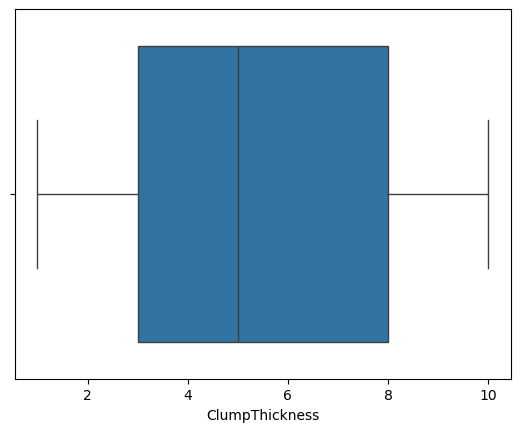

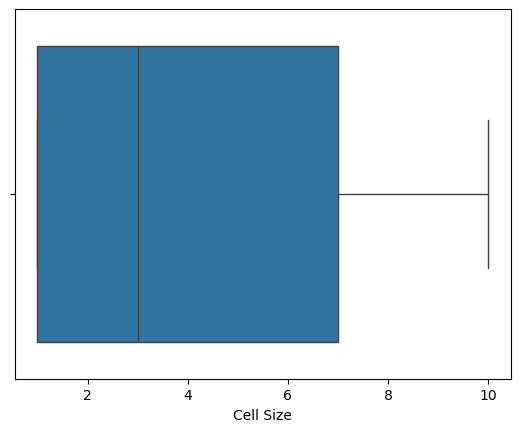

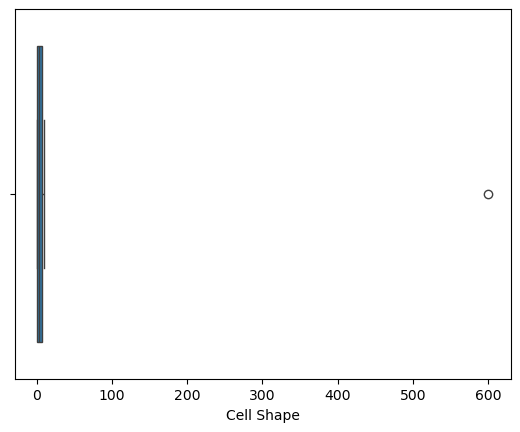

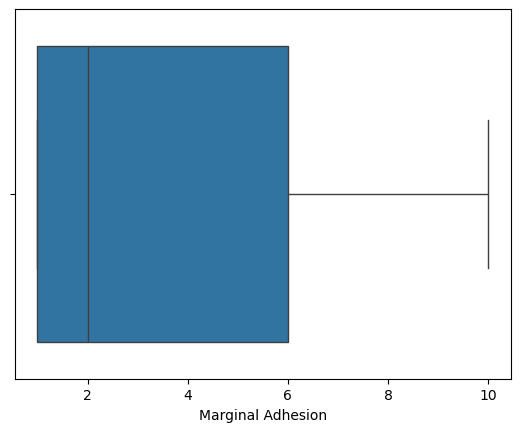

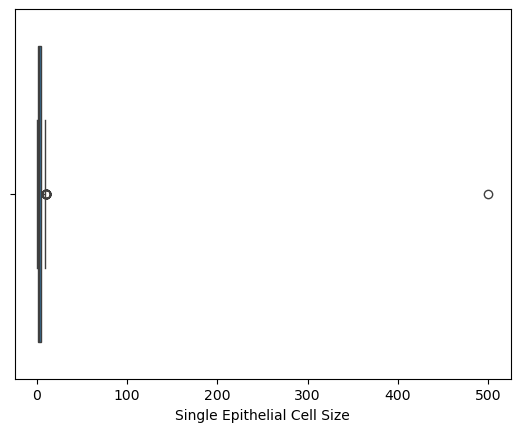

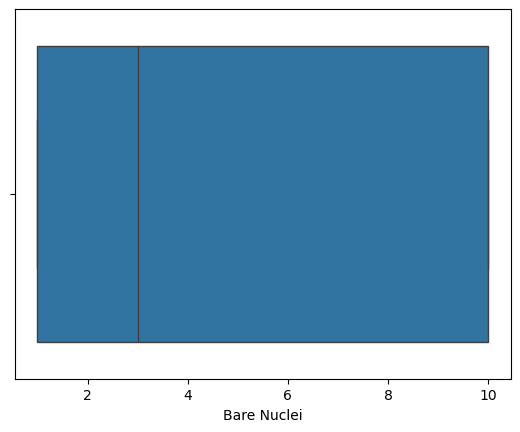

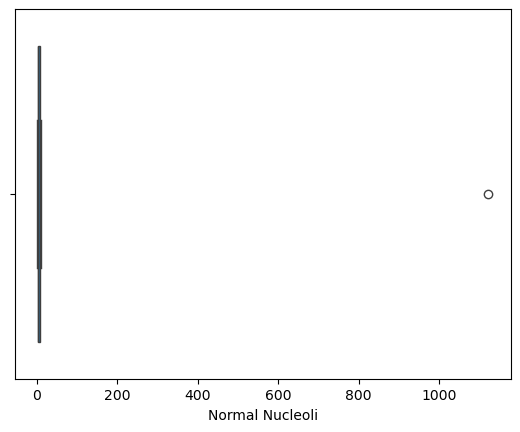

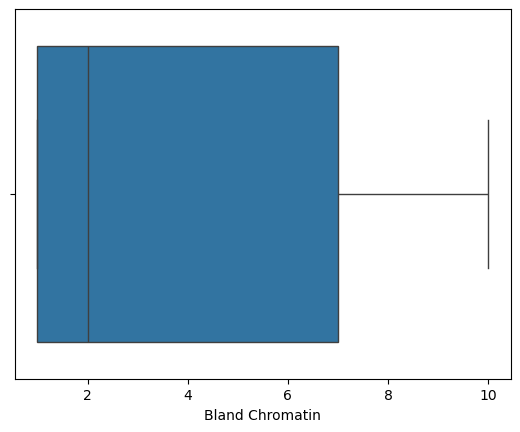

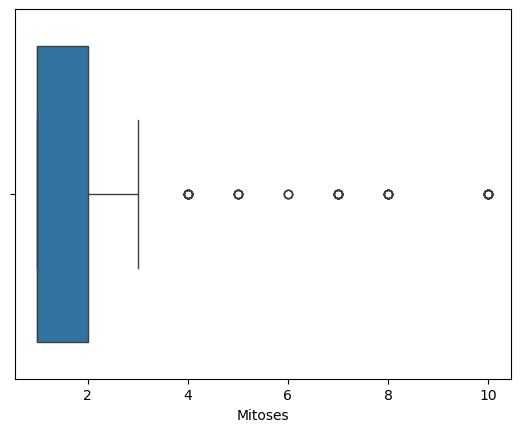

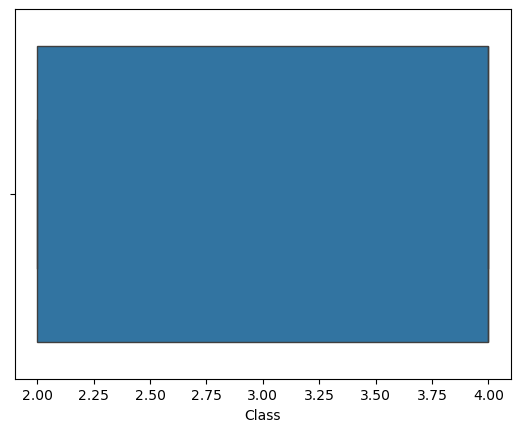

In [34]:
for i in  num_df:
    sns.boxplot(data = df,x = i)
    plt.show()
    

In [35]:
unique_values = {i: df[i].unique() for i in df.columns}
unique_values

{'ClumpThickness': array([ 5.,  3.,  6.,  4.,  8.,  1.,  2.,  7., 10.,  9.]),
 'Cell Size': array([ 1,  4,  8, 10,  2,  3,  7,  5,  6,  9], dtype=int64),
 'Cell Shape': array([  1.,   4.,   8.,  10.,   2.,   3.,   5.,   6.,   7.,   9., 600.]),
 'Marginal Adhesion': array([ 1.,  5.,  8.,  3., 10.,  4.,  6.,  2.,  9.,  7.]),
 'Single Epithelial Cell Size': array([  2.,   7.,   3.,   1.,   6.,   4.,   5.,   8.,  10.,   9., 500.]),
 'Bare Nuclei': array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.]),
 'Normal Nucleoli': array([3.000e+00, 9.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 5.000e+00,
        7.000e+00, 8.000e+00, 6.000e+00, 1.000e+01, 1.122e+03]),
 'Bland Chromatin': array([ 1.,  2.,  7.,  4.,  5.,  3., 10.,  6.,  9.,  8.]),
 'Mitoses': array([ 1.,  5.,  4.,  2.,  3.,  7., 10.,  8.,  6.]),
 'Class': array([2, 4], dtype=int64)}

# **Outlier Treatment**

In [36]:
cols = ['Cell Shape','Single Epithelial Cell Size','Normal Nucleoli','Mitoses']

for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    

    df[i] = df[i].clip(lower=lower, upper=upper)

# **Checking Outlier Treated or not**

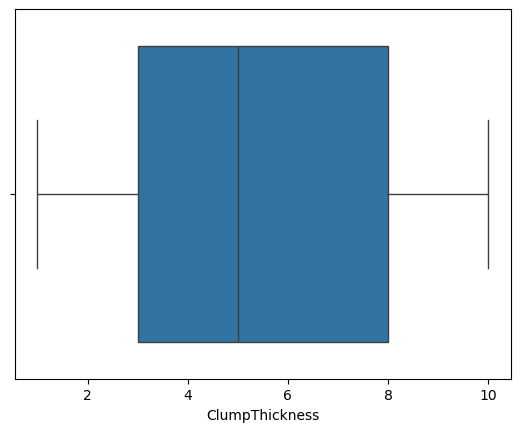

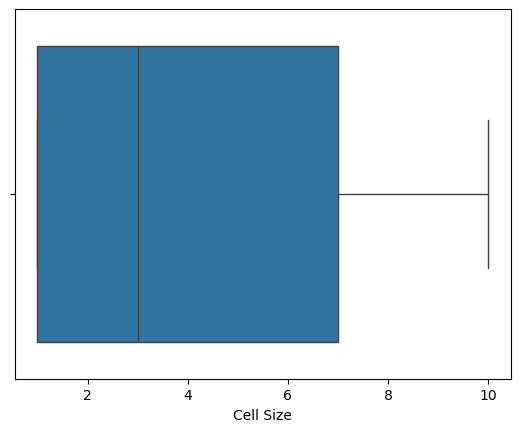

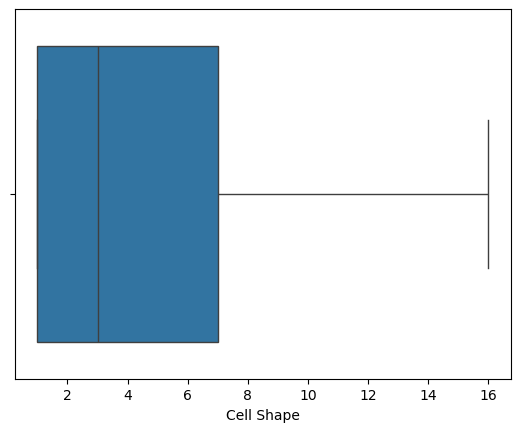

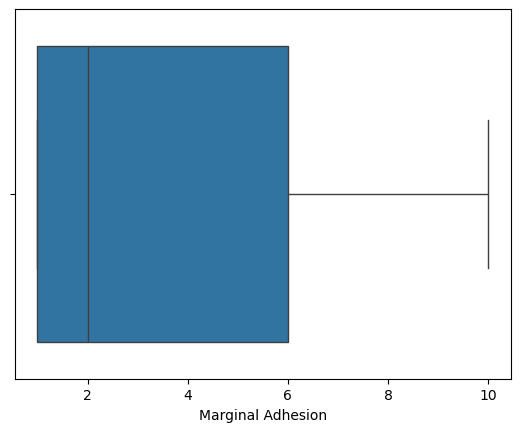

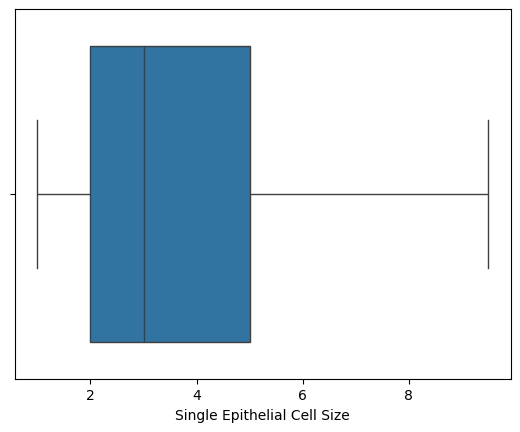

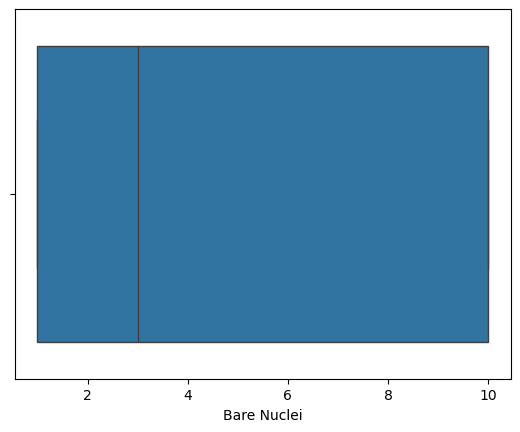

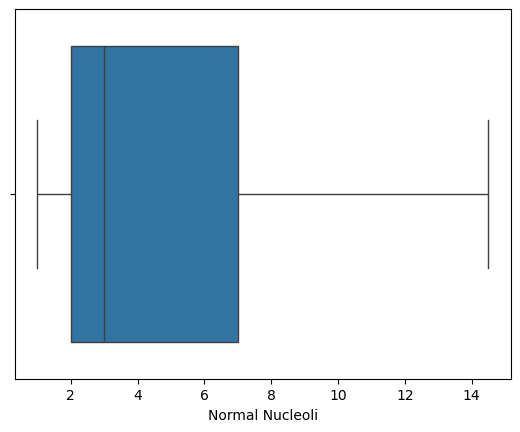

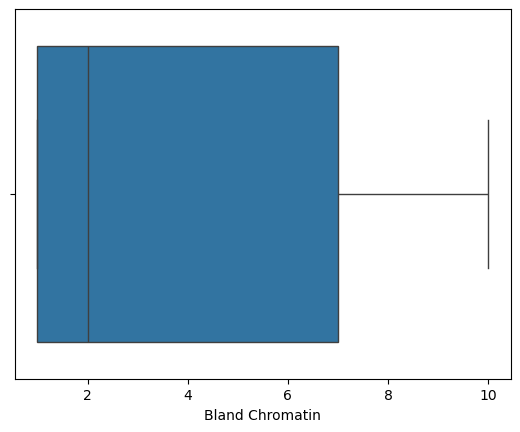

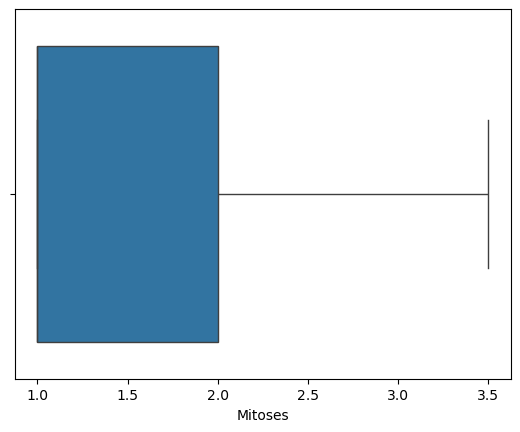

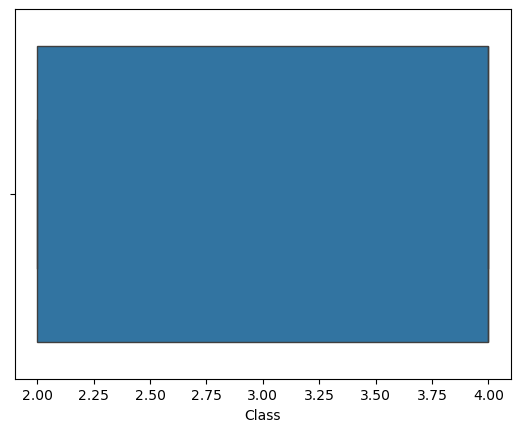

In [37]:
for i in num_df:
    sns.boxplot(data = df, x = i)
    plt.show()

**Observation:**
- Outlier Treated.

# **Correletion**

In [38]:
corr = df.corr()

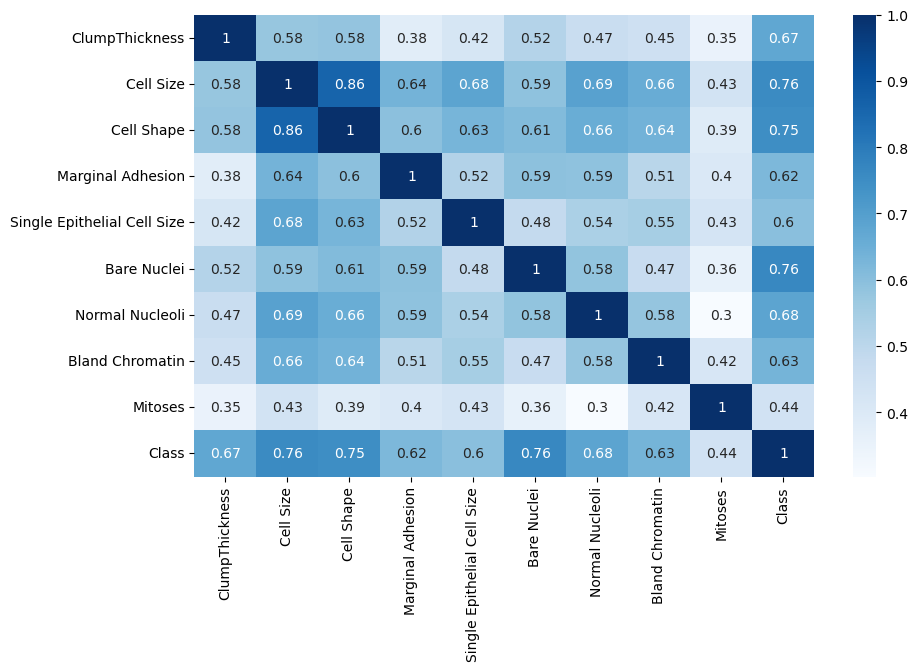

In [39]:
plt.figure(figsize = (10,6)),
sns.heatmap(data = corr,annot = True, cmap = 'Blues')
plt.show()

In [40]:
df1 = df.copy()

In [41]:
df1.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5.0,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,5.0,4,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,3.0,1,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,6.0,8,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,4.0,1,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2


In [42]:
df1.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# **Encoding the Target Variable**

In [43]:
df1['Class'] = df1.Class.replace({2:0, 4:1})

# **Definning Features (X) and Target Variable (Y)**

In [44]:
X = df1.drop('Class',axis = 1)
y = df1.Class

# **Splitting the Data**

In [45]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=5)

In [46]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((367, 9), (92, 9), (367,), (92,))

# **Scaling**

In [47]:
num_cols = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses']

In [48]:
ss = StandardScaler()

In [49]:
Xtrain[num_cols] = ss.fit_transform(Xtrain[num_cols])

In [50]:
Xtest[num_cols] = ss.transform(Xtest[num_cols])

# **Hypothesis**

**Ho (Null Hypothesis)** : Variables are uncorrelated.

**Ha (Alternative Hypothesis)** : At least one pair of variables is correlated.

In [51]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [52]:
chi_squre,p_value = calculate_bartlett_sphericity(Xtrain)

In [53]:
chi_squre

1969.1175276416943

In [54]:
p_value

0.0

In [55]:
p_value<0.05

True

**Observation**
- p is low null will go, Alternate Hypothesis is accepted. At least one pair of variables is correlated.

# **KMO**

In [56]:
kmo_all,kmo_model = calculate_kmo(Xtrain)

In [57]:
kmo_model

0.9173860462899941

In [58]:
kmo_model>0.5

True

**Observation:**
- KMO value is greater than 0.5 and the p-value is less than 0.05, so the data is ready for PCA.

# **Co - Vriance**

In [59]:
cov = np.cov(Xtrain.T)
cov

array([[1.00273224, 0.57805709, 0.58385564, 0.38517936, 0.4104854 ,
        0.50667478, 0.45245443, 0.45704142, 0.37855138],
       [0.57805709, 1.00273224, 0.8523805 , 0.6469392 , 0.6880801 ,
        0.59183716, 0.69440458, 0.64539887, 0.44267153],
       [0.58385564, 0.8523805 , 1.00273224, 0.60237623, 0.63934045,
        0.61608303, 0.64574393, 0.63006863, 0.38798152],
       [0.38517936, 0.6469392 , 0.60237623, 1.00273224, 0.5227529 ,
        0.59684167, 0.60365966, 0.49370097, 0.40942899],
       [0.4104854 , 0.6880801 , 0.63934045, 0.5227529 , 1.00273224,
        0.5030898 , 0.51998804, 0.55017477, 0.4344641 ],
       [0.50667478, 0.59183716, 0.61608303, 0.59684167, 0.5030898 ,
        1.00273224, 0.59594516, 0.48547636, 0.38325995],
       [0.45245443, 0.69440458, 0.64574393, 0.60365966, 0.51998804,
        0.59594516, 1.00273224, 0.56411795, 0.29483066],
       [0.45704142, 0.64539887, 0.63006863, 0.49370097, 0.55017477,
        0.48547636, 0.56411795, 1.00273224, 0.4087543 ],


In [60]:
# np.cov expects data in the format: (features in rows, samples in columns)
# But Xtrain has the format: (samples in rows, features in columns)
# So we use transpose (Xtrain.T) to match what np.cov expects

# **Eigenvalues and Eigenvectors**

In [61]:
eig_value,eig_vactor = np.linalg.eig(cov)

### **Eigen Values**

In [62]:
eig_value 

array([5.33666713, 0.7769784 , 0.13686931, 0.65330235, 0.59671155,
       0.46385318, 0.31048887, 0.39789417, 0.3518252 ])

### **Eigen Vectors**

In [63]:
eig_vactor 

array([[-0.29490855,  0.13218083,  0.01809437,  0.83881392, -0.09943897,
        -0.0778108 ,  0.38511264,  0.14141108,  0.08584591],
       [-0.39050999, -0.0990181 , -0.76441563,  0.01240721,  0.20487323,
        -0.15767461, -0.32929531,  0.27710421, -0.03399556],
       [-0.37963371, -0.15027228,  0.60947356,  0.11543309,  0.18669101,
        -0.1705203 , -0.58891461,  0.16510395,  0.10248529],
       [-0.33144804, -0.10583755,  0.06440374, -0.41184367, -0.42273844,
         0.00106018,  0.29916372,  0.42224516,  0.5086047 ],
       [-0.3320068 ,  0.09329961,  0.08634255, -0.27179816,  0.41067828,
        -0.58469518,  0.42338354, -0.32528914, -0.06438672],
       [-0.33168351, -0.11322527, -0.11686216,  0.04657343, -0.56714648,
        -0.04576117, -0.22219024, -0.69688412,  0.05074491],
       [-0.34125268, -0.37502161,  0.12498584, -0.10089384, -0.11575981,
         0.27730125,  0.21968481,  0.14726793, -0.74622972],
       [-0.32929574,  0.02438332, -0.01556144, -0.03120573,  0

### **Total Eigen Value**

In [64]:
total_eig_val = sum(eig_value)
total_eig_val 

9.024590163934418

In [65]:
sorted_eig_val = sorted(eig_value,reverse = True)
sorted_eig_val  

[5.3366671338497245,
 0.7769783983710322,
 0.653302351701084,
 0.5967115493579791,
 0.46385318256788555,
 0.39789417342943567,
 0.35182519659432476,
 0.31048886989794977,
 0.13686930816500364]

# **Explained Variance from Eigenvalues**

In [66]:
var_exp = []
for i in sorted_eig_val:
    var_exp.append(i/total_eig_val*100)

# **Variance % By each PC**

In [67]:
var_exp

[59.13473118343933,
 8.609569900205814,
 7.239135958903935,
 6.612062581441737,
 5.139880860425258,
 4.4089999235596,
 3.8985171648054187,
 3.4404761242098005,
 1.5166263030091245]

# **Cummulative Variance Explained**

In [68]:
np.cumsum(var_exp)

array([ 59.13473118,  67.74430108,  74.98343704,  81.59549962,
        86.73538048,  91.14438041,  95.04289757,  98.4833737 ,
       100.        ])

# **Scree Plot**

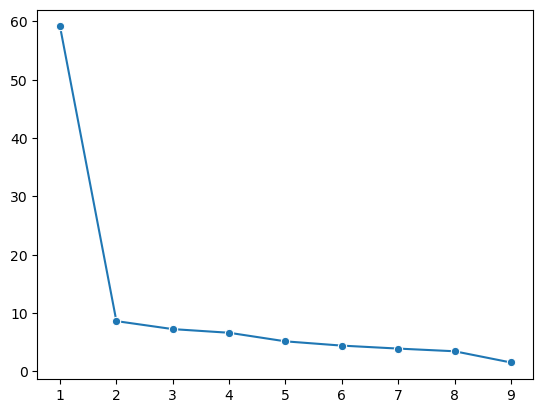

In [69]:
sns.lineplot(x=range(1,len(var_exp)+1),y=var_exp,marker='o')
plt.show()

# **PCA with 6 Components**

In [70]:
pca = PCA(n_components=6)

In [71]:
data_reduced_Xtrain = pca.fit_transform(Xtrain)
data_reduced_Xtrain.T

array([[-2.50074558, -2.16791135,  1.15223491, ...,  3.70295598,
         1.86798584,  3.94949638],
       [ 0.07289852,  0.06568367, -0.80714383, ...,  1.62736896,
        -0.63698002,  0.87222333],
       [-0.10669706,  0.73499938,  0.15275215, ..., -0.12990115,
         0.37635519,  0.09883727],
       [-0.20973499,  0.06976378,  0.18026298, ..., -0.29021661,
         1.23544084,  1.61294497],
       [ 0.20790006,  0.01827448, -1.19010601, ...,  0.20010067,
        -0.4349407 , -1.25087744],
       [ 0.04151879, -0.23917872, -0.05590459, ..., -0.06452925,
         0.33754377, -1.24210429]])

In [72]:
data_reduced_Xtest = pca.transform(Xtest)
data_reduced_Xtest.T

array([[-1.50276717e+00,  3.02237489e+00, -2.03419923e+00,
        -2.55676422e+00,  2.36521345e+00,  1.23196689e+00,
        -1.47335149e+00,  8.05487882e-01, -4.45230157e-01,
         3.13872897e+00,  3.54156541e+00, -1.48314691e+00,
         2.27234413e+00,  1.73905884e-01,  6.51369193e-01,
         1.36685857e+00, -2.28206631e+00, -2.16720691e+00,
        -2.66876115e+00,  7.92534026e-01, -2.44907554e+00,
         2.99464247e-01,  5.77552808e-01, -3.06615141e+00,
        -1.84274750e+00,  3.21148906e+00, -2.80194990e+00,
         1.44300470e+00,  2.95505514e+00,  5.74831825e-01,
         2.71116362e+00, -2.48141881e+00,  5.03265866e+00,
        -2.05210144e+00,  2.89367853e+00,  1.66989995e+00,
        -1.92127720e+00, -2.30849344e+00, -2.59819503e+00,
         2.42448911e+00, -1.63067247e+00, -2.94150004e+00,
        -2.39100408e+00, -2.37905956e+00, -3.80806681e-01,
        -2.49946401e+00, -2.57645305e+00, -1.91061985e+00,
        -1.70360438e+00, -2.22014262e+00,  1.65002510e+0

# **PCA Components Matrix**

In [73]:
pca.components_ 

array([[ 0.29490855,  0.39050999,  0.37963371,  0.33144804,  0.3320068 ,
         0.33168351,  0.34125268,  0.32929574,  0.24783017],
       [ 0.13218083, -0.0990181 , -0.15027228, -0.10583755,  0.09329961,
        -0.11322527, -0.37502161,  0.02438332,  0.88101065],
       [ 0.83881392,  0.01240721,  0.11543309, -0.41184367, -0.27179816,
         0.04657343, -0.10089384, -0.03120573, -0.16155677],
       [ 0.09943897, -0.20487323, -0.18669101,  0.42273844, -0.41067828,
         0.56714648,  0.11575981, -0.45334477,  0.15919779],
       [-0.0778108 , -0.15767461, -0.1705203 ,  0.00106018, -0.58469518,
        -0.04576117,  0.27730125,  0.71055564,  0.11940714],
       [-0.14141108, -0.27710421, -0.16510395, -0.42224516,  0.32528914,
         0.69688412, -0.14726793,  0.27151722, -0.10390345]])

In [74]:
explained_var = pca.explained_variance_ratio_
pd.DataFrame(explained_var)*100

,0
0,59.134731
1,8.609570
2,7.239136
3,6.612063
4,5.139881
5,4.409000


# **Cummulative Variance Explained** (pc = 6)

In [75]:
cummulative_var = np.cumsum(pca.explained_variance_ratio_*100)
pd.DataFrame(cummulative_var)

,0
0,59.134731
1,67.744301
2,74.983437
3,81.595500
4,86.735380
5,91.144380


In [76]:
df_comp = pd.DataFrame(data = pca.components_,columns = list(X.columns))
df_comp  #How important each original feature is in each principal component.

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.294909,0.390510,0.379634,0.331448,0.332007,0.331684,0.341253,0.329296,0.247830
1,0.132181,-0.099018,-0.150272,-0.105838,0.093300,-0.113225,-0.375022,0.024383,0.881011
2,0.838814,0.012407,0.115433,-0.411844,-0.271798,0.046573,-0.100894,-0.031206,-0.161557
3,0.099439,-0.204873,-0.186691,0.422738,-0.410678,0.567146,0.115760,-0.453345,0.159198
4,-0.077811,-0.157675,-0.170520,0.001060,-0.584695,-0.045761,0.277301,0.710556,0.119407
5,-0.141411,-0.277104,-0.165104,-0.422245,0.325289,0.696884,-0.147268,0.271517,-0.103903


In [77]:
pd.DataFrame(data_reduced_Xtrain)

,0,1,2,3,4,5
0,-2.500746,0.072899,-0.106697,-0.209735,0.207900,0.041519
1,-2.167911,0.065684,0.734999,0.069764,0.018274,-0.239179
2,1.152235,-0.807144,0.152752,0.180263,-1.190106,-0.055905
3,-2.296991,0.164223,0.472847,-0.141032,0.154140,-0.056183
4,-1.666830,-0.018629,0.285765,0.024284,0.247167,-0.166277
...,...,...,...,...,...,...
362,-1.852974,0.165067,-0.249599,0.449826,-0.401505,-0.616830
363,-2.458645,0.104899,-0.211705,-0.248193,-0.248138,0.097894
364,3.702956,1.627369,-0.129901,-0.290217,0.200101,-0.064529
365,1.867986,-0.636980,0.376355,1.235441,-0.434941,0.337544


In [78]:
pd.DataFrame(data_reduced_Xtest)

,0,1,2,3,4,5
0,-1.502767,-0.890559,-0.922038,-0.173172,0.566686,-0.534798
1,3.022375,-0.928319,0.905663,-2.503729,-0.071812,-0.781524
2,-2.034199,-0.174502,-0.234743,-0.153368,0.208644,-0.281882
3,-2.556764,0.300440,0.922951,0.157813,0.061452,-0.268318
4,2.365213,0.202943,0.175256,-0.713805,0.749197,-0.371490
...,...,...,...,...,...,...
87,-2.259736,0.034559,0.231976,-0.161461,-0.130141,-0.223128
88,1.192690,-1.080765,-0.775851,-0.842436,1.546220,-0.910857
89,0.293572,-0.589711,0.183594,0.267539,-0.680204,1.276025
90,-2.714971,-0.156182,-0.309845,0.104975,0.371556,-0.180501


In [79]:
xtrain = pd.DataFrame(data = data_reduced_Xtrain,columns = ['PC0','PC1','PC2','PC3','PC4','PC5'])
xtrain.head()

,PC0,PC1,PC2,PC3,PC4,PC5
0,-2.500746,0.072899,-0.106697,-0.209735,0.207900,0.041519
1,-2.167911,0.065684,0.734999,0.069764,0.018274,-0.239179
2,1.152235,-0.807144,0.152752,0.180263,-1.190106,-0.055905
3,-2.296991,0.164223,0.472847,-0.141032,0.154140,-0.056183
4,-1.666830,-0.018629,0.285765,0.024284,0.247167,-0.166277


In [80]:
xtest = pd.DataFrame(data = data_reduced_Xtest,columns = ['PC0','PC1','PC2','PC3','PC4','PC5'])
xtest.head()

,PC0,PC1,PC2,PC3,PC4,PC5
0,-1.502767,-0.890559,-0.922038,-0.173172,0.566686,-0.534798
1,3.022375,-0.928319,0.905663,-2.503729,-0.071812,-0.781524
2,-2.034199,-0.174502,-0.234743,-0.153368,0.208644,-0.281882
3,-2.556764,0.300440,0.922951,0.157813,0.061452,-0.268318
4,2.365213,0.202943,0.175256,-0.713805,0.749197,-0.371490


In [81]:
df_comp.abs().idxmax()

ClumpThickness                 2
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              3
Single Epithelial Cell Size    4
Bare Nuclei                    5
Normal Nucleoli                1
Bland Chromatin                4
Mitoses                        1
dtype: int64

# **Observations:**
| Principal Component | Most Influential Features                      |
|---------------------|------------------------------------------------|
| PC0                 | Cell Size, Cell Shape, Normal Nucleoli         |
| PC1                 | Mitoses                                        |
| PC2                 | Clump Thickness                                |
| PC3                 | Bare Nuclei                                    |
| PC4                 | Single Epithelial Cell Size, Bland Chromatin   |
| PC5                 | Bare Nuclei, Normal Nucleoli                   |

In [82]:
xtrain.head()

,PC0,PC1,PC2,PC3,PC4,PC5
0,-2.500746,0.072899,-0.106697,-0.209735,0.207900,0.041519
1,-2.167911,0.065684,0.734999,0.069764,0.018274,-0.239179
2,1.152235,-0.807144,0.152752,0.180263,-1.190106,-0.055905
3,-2.296991,0.164223,0.472847,-0.141032,0.154140,-0.056183
4,-1.666830,-0.018629,0.285765,0.024284,0.247167,-0.166277


In [83]:
xtest.head()

,PC0,PC1,PC2,PC3,PC4,PC5
0,-1.502767,-0.890559,-0.922038,-0.173172,0.566686,-0.534798
1,3.022375,-0.928319,0.905663,-2.503729,-0.071812,-0.781524
2,-2.034199,-0.174502,-0.234743,-0.153368,0.208644,-0.281882
3,-2.556764,0.300440,0.922951,0.157813,0.061452,-0.268318
4,2.365213,0.202943,0.175256,-0.713805,0.749197,-0.371490


In [84]:
ytrain.head()

133    0
19     0
434    0
432    0
240    0
Name: Class, dtype: int64

In [85]:
ytest.head()

72     0
44     1
382    0
472    0
215    1
Name: Class, dtype: int64

# **Modelling**

# **Logistic Regression (Default)**

In [86]:
logistic_model = LogisticRegression()
logistic_model.fit(xtrain,ytrain)

LogisticRegression()

### **Prediction**

In [87]:
train_pred_lr = logistic_model.predict(xtrain)   ## Default Threshhold -- 0.5
test_pred_lr = logistic_model.predict(xtest)

### **Probability**

In [88]:
train_prob_lr = logistic_model.predict_proba(xtrain)[:,1]
test_prob_lr = logistic_model.predict_proba(xtest)[:,1]

### **Model Evalution (Train Data)**

In [89]:
print(confusion_matrix(ytrain,train_pred_lr))

[[166  10]
 [ 11 180]]


In [90]:
print(classification_report(ytrain,train_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       176
           1       0.95      0.94      0.94       191

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367



In [91]:
roc_auc_score(ytrain,train_prob_lr)

0.9892610661589719

In [92]:
accuracy_score(ytrain,train_pred_lr)

0.9427792915531336

#### **ROC Curve (Train Data)**

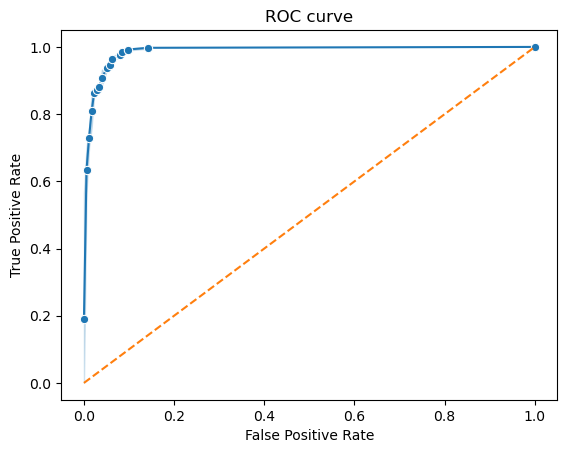

In [93]:
fpr,tpr,threshold=roc_curve(ytrain,train_prob_lr)
sns.lineplot(x=fpr,y=tpr,marker='o',)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### **Model Evalution (Test Data)**

In [94]:
print(confusion_matrix(ytest,test_pred_lr))

[[45  0]
 [ 2 45]]


In [95]:
print(classification_report(ytest,test_pred_lr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        47

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [96]:
roc_auc_score(ytest,test_prob_lr)

1.0

In [97]:
accuracy_score(ytest,test_pred_lr)

0.9782608695652174

#### **ROC Curve (Test Data)**

Text(0, 0.5, 'True postive Rate')

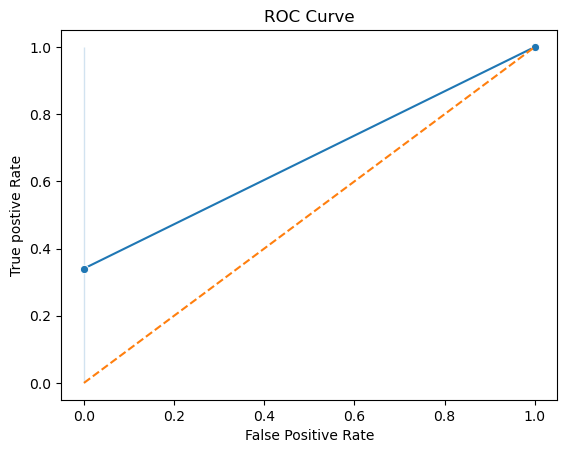

In [98]:
fpr,tpr,thresh = roc_curve(ytest,test_prob_lr)
sns.lineplot(x = fpr,y = tpr, marker = 'o')
plt.plot([0,1],[0,1],linestyle = '--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True postive Rate')

### **Coefficients**

In [99]:
logistic_model.coef_

array([[1.94183069, 0.05099516, 0.85320976, 0.79953409, 0.19941552,
        0.40317277]])

### **Intercept**

In [100]:
logistic_model.intercept_

array([0.70561671])

# **Logistic Regression (Grid Search)**

In [220]:
param_grid_lr ={'penalty':['l1','l2','elasticnet'],
           'C':[0.01,0.1,1,10],
           'solver':['saga','sag'],
           'l1_ratio':[0,0.5,1],
           'max_iter':[150,500,1000],
           'tol':[1e-4, 1e-3, 1e-2]}

grid=GridSearchCV(LogisticRegression(),param_grid_lr,cv=5,scoring='accuracy',n_jobs=-1)

grid.fit(xtrain,ytrain)

print('Best parameters:',grid.best_params_)
print('Best scores:',grid.best_score_)

Best parameters: {'C': 0.1, 'l1_ratio': 0, 'max_iter': 150, 'penalty': 'l2', 'solver': 'saga', 'tol': 0.0001}
Best scores: 0.9455016660496114


In [102]:
logistic_tunned = LogisticRegression(C = 0.01,l1_ratio=0,max_iter=500,penalty='l2',solver='sag',tol=0.01)
logistic_tunned.fit(xtrain,ytrain)

LogisticRegression(C=0.01, l1_ratio=0, max_iter=500, solver='sag', tol=0.01)

### **Prediction**

In [103]:
train_pred_lr_grid = logistic_tunned.predict(xtrain)

In [104]:
test_pred_lr_grid = logistic_tunned.predict(xtest)

### **Probabilities**

In [105]:
train_prob_lr_grid = logistic_tunned.predict_proba(xtrain)[:,1]

In [106]:
test_prob_lr_grid = logistic_tunned.predict_proba(xtest)[:,1]

### **Model Evalution (Train Data)**

In [107]:
confusion_matrix(ytrain,train_pred_lr_grid)

array([[165,  11],
       [ 11, 180]], dtype=int64)

In [108]:
print(classification_report(ytrain,train_pred_lr_grid))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       176
           1       0.94      0.94      0.94       191

    accuracy                           0.94       367
   macro avg       0.94      0.94      0.94       367
weighted avg       0.94      0.94      0.94       367



In [109]:
roc_auc_score(ytrain,train_prob_lr_grid)

0.9866432651118515

In [110]:
accuracy_score(ytrain,train_pred_lr_grid)

0.9400544959128065

### **Model Evalution (Test Data)**

In [111]:
confusion_matrix(ytest,test_pred_lr_grid)

array([[45,  0],
       [ 2, 45]], dtype=int64)

In [112]:
print(classification_report(ytest,test_pred_lr_grid))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        47

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [113]:
roc_auc_score(ytest,test_prob_lr_grid)

1.0

In [114]:
accuracy_score(ytest,test_pred_lr_grid)

0.9782608695652174

# **KNN (Default)**

In [115]:
knn_score=[]

for i in range(1,20,2):
    kn_1=KNeighborsClassifier(n_neighbors=i)
    model_1=kn_1.fit(xtrain,ytrain)
    knn_score.append(model_1.score(xtest,ytest))
    
    
knn_score

[0.9782608695652174,
 0.967391304347826,
 0.9891304347826086,
 0.9782608695652174,
 0.967391304347826,
 0.967391304347826,
 0.967391304347826,
 0.967391304347826,
 0.967391304347826,
 0.967391304347826]

## **Misclassification Error**

In [116]:
mce=[1-i for i in knn_score]
mce

[0.021739130434782594,
 0.03260869565217395,
 0.010869565217391353,
 0.021739130434782594,
 0.03260869565217395,
 0.03260869565217395,
 0.03260869565217395,
 0.03260869565217395,
 0.03260869565217395,
 0.03260869565217395]

## **Choosing K Value**

In [117]:
k_values = pd.DataFrame({'K Value':range(1,20,2),'MCE':mce }).sort_values(by='MCE').reset_index().drop('index',axis = 1)
k_values

,K Value,MCE
0,5,0.010870
1,1,0.021739
2,7,0.021739
3,3,0.032609
4,9,0.032609
5,11,0.032609
6,13,0.032609
7,15,0.032609
8,17,0.032609
9,19,0.032609


## **K vs MCE values**

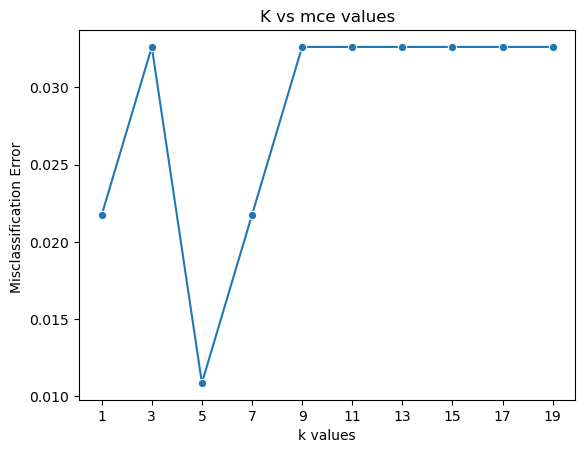

In [219]:
sns.lineplot(x=range(1,21,2),y=mce,marker='o')
plt.title('K vs mce values')
plt.xlabel('k values')
plt.ylabel('Misclassification Error ')
plt.xticks(range(1,21,2))
plt.show()

## **Observation:**
- The lowest MCE value is observed at K = 5. Therefore, for modeling, we choose K = 5.

# **KNN with K = 5**

In [119]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

### **Prediction**

In [120]:
train_pred_knn = knn.predict(xtrain)

In [121]:
test_pred_knn = knn.predict(xtest)

### **Probabilities**

In [122]:
train_prob_knn = knn.predict_proba(xtrain)[:,1]

In [123]:
test_prob_knn = knn.predict_proba(xtest)[:,1]

### **Model Evalution (Train Data)**

In [124]:
confusion_matrix(ytrain,train_pred_knn)

array([[166,  10],
       [  8, 183]], dtype=int64)

In [125]:
print(classification_report(ytrain,train_pred_knn))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       176
           1       0.95      0.96      0.95       191

    accuracy                           0.95       367
   macro avg       0.95      0.95      0.95       367
weighted avg       0.95      0.95      0.95       367



In [126]:
roc_auc_score(ytrain,train_prob_knn)

0.9901237505949547

In [127]:
accuracy_score(ytrain,train_pred_knn)

0.9509536784741145

### **Model Evalution (Test Data)**

In [128]:
confusion_matrix(ytest,test_pred_knn)

array([[45,  0],
       [ 1, 46]], dtype=int64)

In [129]:
print(classification_report(ytest,test_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.98      0.99        47

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92



In [130]:
roc_auc_score(ytest,test_prob_knn)

0.9990543735224586

# **KNN (Grid Search)**

In [131]:
param_grid_knn = {'n_neighbors':list(range(1,20,2)),
         'algorithm': ['auto','brute'],
         'p':[1,2],
         'metric':['minkowski','euclidean','manhattan']}


grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(xtrain, ytrain)

print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 11, 'p': 2}
Best score: 0.9482413920770085


In [132]:
knn_tunned =  KNeighborsClassifier(algorithm='auto',metric='minkowski',n_neighbors=11,p=2)
knn_tunned.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=11)

### **Prediction**

In [133]:
train_pred_knn_grid = knn_tunned.predict(xtrain)

In [134]:
test_pred_knn_grid = knn_tunned.predict(xtest)

### **Probabilities**

In [135]:
train_prob_knn_grid = knn_tunned.predict_proba(xtrain)[:,1]

In [136]:
test_prob_knn_grid = knn_tunned.predict_proba(xtest)[:,1]

### **Model Evalution (Train Data)**

In [137]:
confusion_matrix(ytrain,train_pred_knn_grid)

array([[167,   9],
       [  9, 182]], dtype=int64)

In [138]:
print(classification_report(ytrain,train_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       176
           1       0.95      0.95      0.95       191

    accuracy                           0.95       367
   macro avg       0.95      0.95      0.95       367
weighted avg       0.95      0.95      0.95       367



In [139]:
roc_auc_score(ytrain,train_prob_knn_grid)

0.9916408852927178

In [140]:
accuracy_score(ytrain,train_pred_knn_grid)

0.9509536784741145

### **Model Evalution (Test Data)**

In [141]:
confusion_matrix(ytest,test_pred_knn_grid)

array([[45,  0],
       [ 3, 44]], dtype=int64)

In [142]:
print(classification_report(ytest,test_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        45
           1       1.00      0.94      0.97        47

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



In [143]:
roc_auc_score(ytest,test_prob_knn_grid)

1.0

In [144]:
accuracy_score(ytest,test_pred_knn_grid)

0.967391304347826

# **Navie Bayes**

In [145]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

GaussianNB()

### **Prediction**

In [146]:
train_pred_nb = nb.predict(xtrain)

In [147]:
test_pred_nb = nb.predict(xtest)

### **Probabilities**

In [148]:
train_prob_nb = nb.predict_proba(xtrain)[:,1]

In [149]:
test_prob_nb = nb.predict_proba(xtest)[:,1]

### **Evalution Metrics (Train Data)**

In [150]:
confusion_matrix(ytrain,train_pred_nb)

array([[156,  20],
       [  5, 186]], dtype=int64)

In [151]:
print(classification_report(ytrain, train_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       176
           1       0.90      0.97      0.94       191

    accuracy                           0.93       367
   macro avg       0.94      0.93      0.93       367
weighted avg       0.93      0.93      0.93       367



In [152]:
roc_auc_score(ytrain,train_prob_nb)

0.9840849595430747

In [153]:
accuracy_score(ytrain,train_pred_nb)

0.9318801089918256

### **Evalution Metrics (Test Data)**

In [154]:
confusion_matrix(ytest,test_pred_nb)

array([[42,  3],
       [ 2, 45]], dtype=int64)

In [155]:
print(classification_report(ytest,test_pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        45
           1       0.94      0.96      0.95        47

    accuracy                           0.95        92
   macro avg       0.95      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



In [156]:
roc_auc_score(ytest,test_prob_nb)

0.9891252955082742

In [157]:
accuracy_score(ytest,test_pred_nb)

0.9456521739130435

# **Decision Tree (Default)**

In [158]:
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

### **Prediction**

In [159]:
train_pred_dt = dt.predict(xtrain)

In [160]:
test_pred_dt = dt.predict(xtest)

### **Probabilities**

In [161]:
train_prob_dt = dt.predict_proba(xtrain)[:,1]

In [162]:
test_prob_dt = dt.predict_proba(xtest)[:,1]

### **Evalution Metrics (Train Data)**

In [163]:
confusion_matrix(ytrain,train_pred_dt)

array([[176,   0],
       [  0, 191]], dtype=int64)

In [164]:
print(classification_report(ytrain,train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       191

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367



In [165]:
roc_auc_score(ytrain,train_prob_dt)

1.0

In [166]:
accuracy_score(ytrain,train_pred_dt)

1.0

### **Evalution Metrics (Train Data)**

In [167]:
confusion_matrix(ytest,test_pred_dt)

array([[44,  1],
       [ 7, 40]], dtype=int64)

In [168]:
print(classification_report(ytest,test_pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.98      0.85      0.91        47

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



In [169]:
roc_auc_score(ytest,test_prob_dt)

0.9144208037825059

In [170]:
accuracy_score(ytest,test_pred_dt)

0.9130434782608695

# **Decision Tree (Grid Search)**

In [171]:
param_grid_dt = {'criterion':['gini','entropy'],
                 'max_depth':[5,10,15,20],
                'min_samples_split':[5,10,15,20],
                'min_samples_leaf':[5,10,15,20]}
grid_dt = GridSearchCV(DecisionTreeClassifier(),param_grid_dt,cv = 5,scoring='accuracy',n_jobs=-1)
grid_dt.fit(xtrain,ytrain)
print('Best Parameters',grid_dt.best_params_)
print('Best Score',grid_dt.best_score_)

Best Parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 5}
Best Score 0.9399851906701221


In [172]:
dt_tunned = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=10,min_samples_split=15)
dt_tunned.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=15)

### **Prediction**

In [173]:
train_pred_dt_grid = dt_tunned.predict(xtrain)

In [174]:
test_pred_dt_grid = dt_tunned.predict(xtest)

### **Probabilities**

In [175]:
train_prob_dt_grid = dt_tunned.predict_proba(xtrain)[:,1]

In [176]:
test_prob_dt_grid = dt_tunned.predict_proba(xtest)[:,1]

### **Evalution Metics (Train Data)**

In [177]:
confusion_matrix(ytrain,train_pred_dt_grid)

array([[165,  11],
       [  5, 186]], dtype=int64)

In [178]:
print(classification_report(ytrain,train_pred_dt_grid))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       176
           1       0.94      0.97      0.96       191

    accuracy                           0.96       367
   macro avg       0.96      0.96      0.96       367
weighted avg       0.96      0.96      0.96       367



In [179]:
roc_auc_score(ytrain,train_prob_dt_grid)

0.9949131366016182

In [180]:
accuracy_score(ytrain,train_pred_dt_grid)

0.9564032697547684

### **Evalution Metics (Test Data)**

In [181]:
confusion_matrix(ytest,test_pred_dt_grid)

array([[45,  0],
       [ 2, 45]], dtype=int64)

In [182]:
print(classification_report(ytest,test_pred_dt_grid))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        45
           1       1.00      0.96      0.98        47

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92



In [183]:
roc_auc_score(ytest,test_prob_dt_grid)

1.0

In [184]:
accuracy_score(ytest,test_pred_dt_grid)

0.9782608695652174

# **Random Forest**

In [185]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

### **Prediction**

In [186]:
train_pred_rf = rf.predict(xtrain)

In [187]:
test_pred_rf = rf.predict(xtest)

### **Probabilities**

In [188]:
train_prob_rf = rf.predict_proba(xtrain)[:,1]

In [189]:
test_prob_rf = rf.predict_proba(xtest)[:,1]

### **Evalution Metrics (Train Data)**

In [190]:
confusion_matrix(ytrain,train_pred_rf)

array([[176,   0],
       [  0, 191]], dtype=int64)

In [191]:
print(classification_report(ytrain,train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       176
           1       1.00      1.00      1.00       191

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367



In [192]:
roc_auc_score(ytrain,train_prob_rf)

1.0

In [193]:
accuracy_score(ytrain,train_pred_rf)

1.0

### **Evalution Metrics (Test Data)**

In [194]:
confusion_matrix(ytest,test_pred_rf)

array([[45,  0],
       [ 0, 47]], dtype=int64)

In [195]:
print(classification_report(ytest,test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        47

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [196]:
roc_auc_score(ytest,test_prob_rf)

1.0

In [197]:
accuracy_score(ytest,test_pred_rf)

1.0

# **Random Forest (Grid Search)**

In [198]:
param_grid_rf = {'criterion':['gini', 'entropy'],
                'max_depth':[5,10,15,20],
                'min_samples_split':[5,10,15,20],
                'min_samples_leaf':[5,10,15,20]}

grid_rf = GridSearchCV(RandomForestClassifier(),param_grid=param_grid_rf,cv = 5,scoring='accuracy',n_jobs=-1)
grid_rf.fit(xtrain,ytrain)

print('Best Parameters',grid_rf.best_params_)
print('Best Score',grid_rf.best_score_)

Best Parameters {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 5}
Best Score 0.9481673454276194


In [199]:
rf_tunned = RandomForestClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 10, min_samples_split = 5)
rf_tunned.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=5)

### **Prediction**

In [200]:
train_pred_rf_grid = rf_tunned.predict(xtrain)

In [201]:
test_pred_rf_grid = rf_tunned.predict(xtest)

### **Probabilities**

In [202]:
train_prob_rf_grid = rf_tunned.predict_proba(xtrain)[:,1]

In [203]:
test_prob_rf_grid = rf_tunned.predict_proba(xtest)[:,1]

### **Evalution Metrics (Train Data)**

In [204]:
confusion_matrix(ytrain,train_pred_rf_grid)

array([[158,  18],
       [  2, 189]], dtype=int64)

In [205]:
print(classification_report(ytrain,train_pred_rf_grid))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       176
           1       0.91      0.99      0.95       191

    accuracy                           0.95       367
   macro avg       0.95      0.94      0.95       367
weighted avg       0.95      0.95      0.95       367



In [206]:
roc_auc_score(ytrain,train_prob_rf_grid)

0.9950023798191338

In [207]:
accuracy_score(ytrain,train_pred_rf_grid)

0.9455040871934605

### **Evalution Metics**

In [208]:
confusion_matrix(ytest,test_pred_rf_grid)

array([[45,  0],
       [ 0, 47]], dtype=int64)

In [209]:
print(classification_report(ytest,test_pred_rf_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        47

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92



In [210]:
roc_auc_score(ytest,test_pred_rf_grid)

1.0

In [211]:
accuracy_score(ytest,test_pred_rf_grid)

1.0

# **Comparison Table**

In [218]:
results = []

results.append(['Logistic Regression',
    accuracy_score(ytrain, train_pred_lr),
    accuracy_score(ytest, test_pred_lr),
    roc_auc_score(ytrain, train_prob_lr),
    roc_auc_score(ytest, test_prob_lr),
    precision_score(ytrain, train_pred_lr),
    precision_score(ytest, test_pred_lr),
    recall_score(ytrain, train_pred_lr),
    recall_score(ytest, test_pred_lr),
    f1_score(ytrain, train_pred_lr),
    f1_score(ytest, test_pred_lr)])

results.append(['Logistic Regression (GridSearchCV)',
    accuracy_score(ytrain, train_pred_lr_grid),
    accuracy_score(ytest, test_pred_lr_grid),
    roc_auc_score(ytrain, train_prob_lr_grid),
    roc_auc_score(ytest, test_prob_lr_grid),
    precision_score(ytrain, train_pred_lr_grid),
    precision_score(ytest, test_pred_lr_grid),
    recall_score(ytrain, train_pred_lr_grid),
    recall_score(ytest, test_pred_lr_grid),
    f1_score(ytrain, train_pred_lr_grid),
    f1_score(ytest, test_pred_lr_grid)])

results.append(['KNN',
    accuracy_score(ytrain, train_pred_knn),
    accuracy_score(ytest, test_pred_knn),
    roc_auc_score(ytrain, train_prob_knn),
    roc_auc_score(ytest, test_prob_knn),
    precision_score(ytrain, train_pred_knn),
    precision_score(ytest, test_pred_knn),
    recall_score(ytrain, train_pred_knn),
    recall_score(ytest, test_pred_knn),
    f1_score(ytrain, train_pred_knn),
    f1_score(ytest, test_pred_knn)])

results.append(['KNN (GridSearchCV)',
    accuracy_score(ytrain, train_pred_knn_grid),
    accuracy_score(ytest, test_pred_knn_grid),
    roc_auc_score(ytrain, train_prob_knn_grid),
    roc_auc_score(ytest, test_prob_knn_grid),
    precision_score(ytrain, train_pred_knn_grid),
    precision_score(ytest, test_pred_knn_grid),
    recall_score(ytrain, train_pred_knn_grid),
    recall_score(ytest, test_pred_knn_grid),
    f1_score(ytrain, train_pred_knn_grid),
    f1_score(ytest, test_pred_knn_grid)])

results.append(['Naive Bayes',
    accuracy_score(ytrain, train_pred_nb),
    accuracy_score(ytest, test_pred_nb),
    roc_auc_score(ytrain, train_prob_nb),
    roc_auc_score(ytest, test_prob_nb),
    precision_score(ytrain, train_pred_nb),
    precision_score(ytest, test_pred_nb),
    recall_score(ytrain, train_pred_nb),
    recall_score(ytest, test_pred_nb),
    f1_score(ytrain, train_pred_nb),
    f1_score(ytest, test_pred_nb)])

results.append(['Decision Tree',
    accuracy_score(ytrain, train_pred_dt),
    accuracy_score(ytest, test_pred_dt),
    roc_auc_score(ytrain, train_prob_dt),
    roc_auc_score(ytest, test_prob_dt),
    precision_score(ytrain, train_pred_dt),
    precision_score(ytest, test_pred_dt),
    recall_score(ytrain, train_pred_dt),
    recall_score(ytest, test_pred_dt),
    f1_score(ytrain, train_pred_dt),
    f1_score(ytest, test_pred_dt)])

results.append(['Decision Tree (Grid Search)',
    accuracy_score(ytrain, train_pred_dt_grid),
    accuracy_score(ytest, test_pred_dt_grid),
    roc_auc_score(ytrain, train_prob_dt_grid),
    roc_auc_score(ytest, test_prob_dt_grid),
    precision_score(ytrain, train_pred_dt_grid),
    precision_score(ytest, test_pred_dt_grid),
    recall_score(ytrain, train_pred_dt_grid),
    recall_score(ytest, test_pred_dt_grid),
    f1_score(ytrain, train_pred_dt_grid),
    f1_score(ytest, test_pred_dt_grid)])

results.append(['Random Forest',
    accuracy_score(ytrain, train_pred_rf),
    accuracy_score(ytest, test_pred_rf),
    roc_auc_score(ytrain, train_prob_rf),
    roc_auc_score(ytest, test_prob_rf),
    precision_score(ytrain, train_pred_rf),
    precision_score(ytest, test_pred_rf),
    recall_score(ytrain, train_pred_rf),
    recall_score(ytest, test_pred_rf),
    f1_score(ytrain, train_pred_rf),
    f1_score(ytest, test_pred_rf)])

results.append(['Random Forest (Grid Search)',
    accuracy_score(ytrain, train_pred_rf_grid),
    accuracy_score(ytest, test_pred_rf_grid),
    roc_auc_score(ytrain, train_prob_rf_grid),
    roc_auc_score(ytest, test_prob_rf_grid),
    precision_score(ytrain, train_pred_rf_grid),
    precision_score(ytest, test_pred_rf_grid),
    recall_score(ytrain, train_pred_rf_grid),
    recall_score(ytest, test_pred_rf_grid),
    f1_score(ytrain, train_pred_rf_grid),
    f1_score(ytest, test_pred_rf_grid)])

comparison_df = pd.DataFrame(results,columns=['Model',
        'Accuracy (Train)', 'Accuracy (Test)',
        'AUC (Train)', 'AUC (Test)',
        'Precision (Train)', 'Precision (Test)',
        'Recall (Train)', 'Recall (Test)',
        'F1-Score (Train)', 'F1-Score (Test)'])

comparison_df


,Model,Accuracy (Train),Accuracy (Test),AUC (Train),AUC (Test),Precision (Train),Precision (Test),Recall (Train),Recall (Test),F1-Score (Train),F1-Score (Test)
0,Logistic Regression,0.942779,0.978261,0.989261,1.000000,0.947368,1.00000,0.942408,0.957447,0.944882,0.978261
1,Logistic Regression (GridSearchCV),0.940054,0.978261,0.986643,1.000000,0.942408,1.00000,0.942408,0.957447,0.942408,0.978261
2,KNN,0.950954,0.989130,0.990124,0.999054,0.948187,1.00000,0.958115,0.978723,0.953125,0.989247
3,KNN (GridSearchCV),0.950954,0.967391,0.991641,1.000000,0.952880,1.00000,0.952880,0.936170,0.952880,0.967033
4,Naive Bayes,0.931880,0.945652,0.984085,0.989125,0.902913,0.93750,0.973822,0.957447,0.937028,0.947368
5,Decision Tree,1.000000,0.913043,1.000000,0.914421,1.000000,0.97561,1.000000,0.851064,1.000000,0.909091
6,Decision Tree (Grid Search),0.956403,0.978261,0.994913,1.000000,0.944162,1.00000,0.973822,0.957447,0.958763,0.978261
7,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
8,Random Forest (Grid Search),0.945504,1.000000,0.995002,1.000000,0.913043,1.00000,0.989529,1.000000,0.949749,1.000000
